#**PROBLEMA DE NEGOCIO**


---




##Una plataforma de streaming para el hogar, con presencia en todo el mundo, necesita impulsar su rendimiento utilizando datos de tendencias en el sector de manera estratégica. Como científico de datos especializado en la industria del entretenimiento, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cual es la evolución del rating por tipo de contenido?

2. ¿Cual es el rating promedio por género?

3. ¿Cuáles son los géneros que proporcionan mayor ROI?

4. ¿Cuáles son los países con mayor producción de contenido?

5. ¿Cual es tu recomendación para el cliente?

#**1. Configuración del Ambiente**


---




In [151]:
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import dask.dataframe as dd
from google.colab import drive
drive.mount('/content/drive')
global df_title_basics,df_title_ratings,df_tmdb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**2. Obtención, Tratamiento y Análisis Exploratório (EDA)**


---




##**2.1 Cargando las bases de datos**

In [152]:
df_title_basics = dd.read_csv(r'/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/MOVIES_DATASETS/title_basics/title.basics.tsv', dtype={'isAdult': 'object', 'runtimeMinutes': 'object', 'startYear': 'object'}, delimiter='\t', low_memory=False)
df_title_basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [153]:
df_title_basics[df_title_basics.tconst == "tt10872600"].compute()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
646439,tt10872600,movie,Spider-Man: No Way Home,Spider-Man: No Way Home,0,2021,\N,148,"Action,Adventure,Fantasy"


In [154]:
df_title_ratings = dd.read_csv(r'/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/MOVIES_DATASETS/title_basics/title.ratings.tsv', delimiter='\t', low_memory=False)
df_title_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277
2,tt0000003,6.50,2020
3,tt0000004,5.30,180
4,tt0000005,6.20,2786
5,tt0000006,5.10,187
6,tt0000007,5.40,870
7,tt0000008,5.40,2201
8,tt0000009,5.40,212
9,tt0000010,6.80,7586


In [155]:
df_title_ratings[df_title_ratings.tconst == "tt10872600"].compute()

,tconst,averageRating,numVotes
510210,tt10872600,8.20,885551


In [156]:
df_tmdb = dd.read_csv(r'/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/MOVIES_DATASETS/TMDB_movie_dataset_v11.csv/TMDB_movie_dataset_v11.csv', low_memory=False)
df_tmdb.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.95,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.24,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.51,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.64,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.57,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.93,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.71,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.08,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [157]:
df_tmdb[df_tmdb.imdb_id == "tt10872600"].compute()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
57,634649,Spider-Man: No Way Home,7.99,18299,Released,2021-12-15,1921847111,148,False,/14QbnygCuTO0vl7CAFmPf1fgZfV.jpg,200000000,https://www.spidermannowayhome.movie,tt10872600,en,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,186.06,/5weKu49pzJCt06OPpjvT80efnQj.jpg,The Multiverse unleashed.,"Action, Adventure, Science Fiction","Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog","new york city, hero, showdown, magic, loss of ..."


##**2.2 Tratamiento de Datos**

In [158]:
df_title_basics.shape[0].compute()

10826336

In [159]:
df_title_basics.titleType.value_counts(normalize=True).compute()

titleType
tvEpisode      0.77
short          0.09
movie          0.06
video          0.03
tvSeries       0.02
tvMovie        0.01
tvMiniSeries   0.01
tvSpecial      0.00
videoGame      0.00
tvShort        0.00
tvPilot        0.00
Name: proportion, dtype: double[pyarrow]

In [160]:
def preprocesamiento():
    global df_title_basics, df_title_ratings, df_tmdb


    # Eliminar columnas que no son relevantes para este analisis
    df_title_basics = df_title_basics.drop(columns=['primaryTitle', 'endYear'])
    df_tmdb = df_tmdb.drop(columns=['id', 'title', 'status', 'runtime', 'adult', 'backdrop_path',
                                    'homepage', 'original_language', 'original_title', 'overview',
                                    'poster_path', 'tagline', 'production_companies',
                                    'spoken_languages', 'keywords'])

    # Eliminar registros de df_title_basics diferentes de 'tvSeries' y 'movie'.
    df_title_basics = df_title_basics[df_title_basics['titleType'].isin(['tvSeries', 'movie'])]

    # Eliminar registros de df_tmdb donde 'budget' y 'revenue' sean menores o iguales a cero
    df_tmdb = df_tmdb[(df_tmdb['budget'] > 0) & (df_tmdb['revenue'] > 0)]

    # Crear la nueva columna 'ROI' en df_tmdb
    df_tmdb['ROI'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']

    # Eliminar outliers de la columna 'ROI' usando el método del rango intercuartílico (IQR)
    Q1 = df_tmdb['ROI'].quantile(0.25)
    Q3 = df_tmdb['ROI'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_tmdb = df_tmdb[(df_tmdb['ROI'] >= lower_bound) & (df_tmdb['ROI'] <= upper_bound)]

    # Reemplazo valores no deseados ('\\N') por NaN
    df_title_basics = df_title_basics.replace('\\N', np.nan)
    df_title_ratings = df_title_ratings.replace('\\N', np.nan)
    df_tmdb = df_tmdb.replace('\\N', np.nan)

    # Eliminar registros con valores nulos en cada uno de los dataframes
    df_title_basics = df_title_basics.dropna()
    df_title_ratings = df_title_ratings.dropna()
    df_tmdb = df_tmdb.dropna()

    # Eliminar registros duplicados basados en la columna llave tconst en df_title_basics, df_title_ratings
    # y 'imdb_id' en df_tmdb
    df_title_basics.drop_duplicates(subset='tconst', inplace=True)
    df_title_ratings.drop_duplicates(subset='tconst', inplace=True)
    df_tmdb.drop_duplicates(subset='imdb_id', inplace=True)


    # Asegurar que las columnas tengan el tipo de datos correcto
    df_title_basics = df_title_basics.astype({
        'tconst': 'string[pyarrow]',
        'titleType': 'string[pyarrow]',
        'originalTitle': 'string[pyarrow]',
        'isAdult': 'int',
        'startYear': 'int',
        'runtimeMinutes': 'int',
        'genres': 'string[pyarrow]'
    })


    df_title_ratings = df_title_ratings.astype({
        'tconst': 'string[pyarrow]',
        'averageRating': 'float',
        'numVotes': 'int'
    })


    df_tmdb = df_tmdb.astype({
        'imdb_id': 'string[pyarrow]',
        'release_date': 'string[pyarrow]',
        'revenue': 'int',
        'budget': 'int',
        'popularity': 'float',
        'genres': 'string[pyarrow]',
        'production_countries': 'string[pyarrow]',
        'vote_count': 'int',
        'vote_average': 'float',
        'ROI': 'float'
    })

    # Convertir los dfs de Dask a Pandas
    df_title_basics = df_title_basics.compute()
    df_title_ratings = df_title_ratings.compute()
    df_tmdb = df_tmdb.compute()

    # Cambiar el tipo de dato una vez que ya  se hizo la conversion
    df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

In [161]:
preprocesamiento()
print(df_title_basics.info())
print('-------------')
print(df_title_ratings.info())
print('-------------')
print(df_tmdb.info())

<class 'pandas.core.frame.DataFrame'>
Index: 492629 entries, 8 to 783039
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          492629 non-null  string
 1   titleType       492629 non-null  string
 2   originalTitle   492629 non-null  string
 3   isAdult         492629 non-null  int64 
 4   startYear       492629 non-null  int64 
 5   runtimeMinutes  492629 non-null  int64 
 6   genres          492629 non-null  string
dtypes: int64(3), string(4)
memory usage: 43.7 MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443621 entries, 0 to 1443620
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1443621 non-null  string 
 1   averageRating  1443621 non-null  float64
 2   numVotes       1443621 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 40.2 MB
None
------------

In [162]:
df_title_basics.head()

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,0,1894,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,movie,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"


In [163]:
df_title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277
2,tt0000003,6.50,2020
3,tt0000004,5.30,180
4,tt0000005,6.20,2786


In [164]:
df_tmdb.head()

,vote_average,vote_count,release_date,revenue,budget,imdb_id,popularity,genres,production_countries,ROI
0,8.36,34495,2010-07-15,825532764,160000000,tt1375666,83.95,"Action, Science Fiction, Adventure","United Kingdom, United States of America",4.16
1,8.42,32571,2014-11-05,701729206,165000000,tt0816692,140.24,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",3.25
2,8.51,30619,2008-07-16,1004558444,185000000,tt0468569,130.64,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",4.43
4,7.71,29166,2012-04-25,1518815515,220000000,tt0848228,98.08,"Science Fiction, Action, Adventure",United States of America,5.90
6,8.26,27713,2018-04-25,2052415039,300000000,tt4154756,154.34,"Adventure, Action, Science Fiction",United States of America,5.84


In [165]:
# Inspeccionando df_title_basics
print("Descripción de df_title_basics:")
display(df_title_basics.describe(include='all'))

# Inspeccionando df_title_ratings
print("----------------------------------")
print("Descripción de df_title_ratings:")
display(df_title_ratings.describe(include='all'))

# Inspeccionando df_tmdb
print("----------------------------------")
print("Descripción de df_tmdb: ")
display(df_tmdb.describe(include='all'))

Descripción de df_title_basics:


,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres
count,492629,492629,492629,492629.00,492629.00,492629.00,492629
unique,492629,2,446287,NaN,NaN,NaN,1821
top,tt0000009,movie,Home,NaN,NaN,NaN,Documentary
freq,1,397365,37,NaN,NaN,NaN,80496
mean,NaN,NaN,NaN,0.01,1998.21,81.47,NaN
std,NaN,NaN,NaN,0.11,25.27,118.06,NaN
min,NaN,NaN,NaN,0.00,1894.00,1.00,NaN
25%,NaN,NaN,NaN,0.00,1985.00,60.00,NaN
50%,NaN,NaN,NaN,0.00,2009.00,84.00,NaN
75%,NaN,NaN,NaN,0.00,2017.00,98.00,NaN


----------------------------------
Descripción de df_title_ratings:


,tconst,averageRating,numVotes
count,1443621,1443621.00,1443621.00
unique,1443621,NaN,NaN
top,tt0000001,NaN,NaN
freq,1,NaN,NaN
mean,NaN,6.96,1032.36
std,NaN,1.38,17696.14
min,NaN,1.00,5.00
25%,NaN,6.20,11.00
50%,NaN,7.20,26.00
75%,NaN,7.90,101.00


----------------------------------
Descripción de df_tmdb: 


,vote_average,vote_count,release_date,revenue,budget,imdb_id,popularity,genres,production_countries,ROI
count,9122.00,9122.00,9122,9122.00,9122.00,9122,9122.00,9122,9122,9122.00
unique,NaN,NaN,NaN,NaN,NaN,9122,NaN,1860,883,NaN
top,NaN,NaN,NaN,NaN,NaN,tt1375666,NaN,Drama,United States of America,NaN
freq,NaN,NaN,NaN,NaN,NaN,1,NaN,619,4612,NaN
mean,6.16,1383.80,2002-02-24 07:43:57.053277824,58615257.83,24875194.08,NaN,18.30,NaN,NaN,1.04
min,0.00,0.00,1914-04-25 00:00:00,1.00,1.00,NaN,0.00,NaN,NaN,-1.00
25%,5.74,59.00,1995-12-29 18:00:00,1472992.50,2500000.00,NaN,6.16,NaN,NaN,-0.42
50%,6.38,366.00,2007-04-11 12:00:00,11040230.00,10000000.00,NaN,12.72,NaN,NaN,0.48
75%,6.99,1402.75,2014-09-05 00:00:00,50000000.00,30000000.00,NaN,19.83,NaN,NaN,1.96
max,10.00,34495.00,2024-07-23 00:00:00,2800000000.00,460000000.00,NaN,2994.36,NaN,NaN,7.36


##**2.3 Análisis Exploratorio (EDA)**

**Fuentes oficiales para corroborar informes y datos estadisticos**

las 25 películas con mejor puntuación en IMDb de los últimos diez años:  (https://www.culturaocio.com/cine/noticia-25-mejores-peliculas-decada-imdb-20191027111404.html)

Fuente utilizada para corroborar informacion especifica sobre alguna Pelicula o Serie de television:  (https://www.themoviedb.org/)

In [166]:
df_title_basics.describe()

,isAdult,startYear,runtimeMinutes
count,492629.00,492629.00,492629.00
mean,0.01,1998.21,81.47
std,0.11,25.27,118.06
min,0.00,1894.00,1.00
25%,0.00,1985.00,60.00
50%,0.00,2009.00,84.00
75%,0.00,2017.00,98.00
max,1.00,2029.00,51420.00


In [167]:
print(f"Fecha de estreno mas actual: ", df_title_basics['startYear'].max())
print(f"Programacion de mayor duracion: ", df_title_basics['runtimeMinutes'].max())

Fecha de estreno mas actual:  2029
Programacion de mayor duracion:  51420


<ipython-input-168-ad5bd1c6d7aa>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




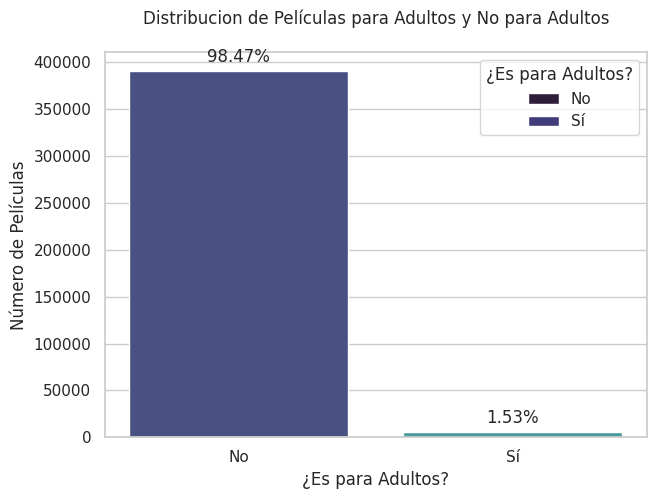

In [168]:
df_pelis = df_title_basics[df_title_basics['titleType'] == 'movie']   # Filtrar las filas donde titleType es 'movie'
peliculas_para_adultos = df_pelis['isAdult'].value_counts().reset_index()  # Ver cuales son para adulto y cuales no
peliculas_para_adultos.columns = ['isAdult', 'count']

# Crear el gráfico de barras
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='isAdult', y='count', data=peliculas_para_adultos, palette='mako')

# Calcular los porcentajes
total = peliculas_para_adultos['count'].sum()
percentajes = [count / total * 100 for count in peliculas_para_adultos['count']]

# Añadir porcentajes encima de las barras
for bar, percentajes in zip(ax.patches, percentajes):
    height = bar.get_height()
    ax.annotate(f'{percentajes:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Añadir leyenda
leyenda = ['No', 'Sí']
for i, label in enumerate(leyenda):
    ax.bar(0, 0, color=sns.color_palette('mako')[i], label=label)

ax.legend(title='¿Es para Adultos?', loc='upper right')

plt.title('Distribucion de Películas para Adultos y No para Adultos', pad=20)
plt.xlabel('¿Es para Adultos?')
plt.ylabel('Número de Películas')
plt.xticks([0, 1], ['No', 'Sí']);

# Guardar el gráfico
plt.savefig('/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/Imagenes/Graficos/Distribucion_pelis_edades.png')

In [169]:
avg_revenue_por_genero = df_tmdb.groupby('genres')['revenue'].mean().reset_index()
avg_revenue_por_genero = avg_revenue_por_genero.sort_values(by='revenue', ascending=False).head(10)
avg_revenue_por_genero

,genres,revenue
1256,"Family, Fantasy, Romance",1266115964.00
1193,"Family, Adventure, Drama, Fantasy",966550600.00
592,"Animation, Family, Comedy, Fantasy, Adventure",928760770.00
81,"Action, Adventure, Science Fiction, Drama",880166924.00
581,"Animation, Family, Adventure, Drama, Comedy",857611174.00
453,"Adventure, Fantasy, Drama, Romance",829747654.00
309,"Adventure, Action, Science Fiction",803765158.06
1218,"Family, Animation, Fantasy, Music, Comedy, Adv...",800526015.00
1286,"Fantasy, Adventure, Action, Family, Romance",758539785.00
1649,"Science Fiction, Adventure, Thriller",755356711.00


<ipython-input-170-c27120fcdd04>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




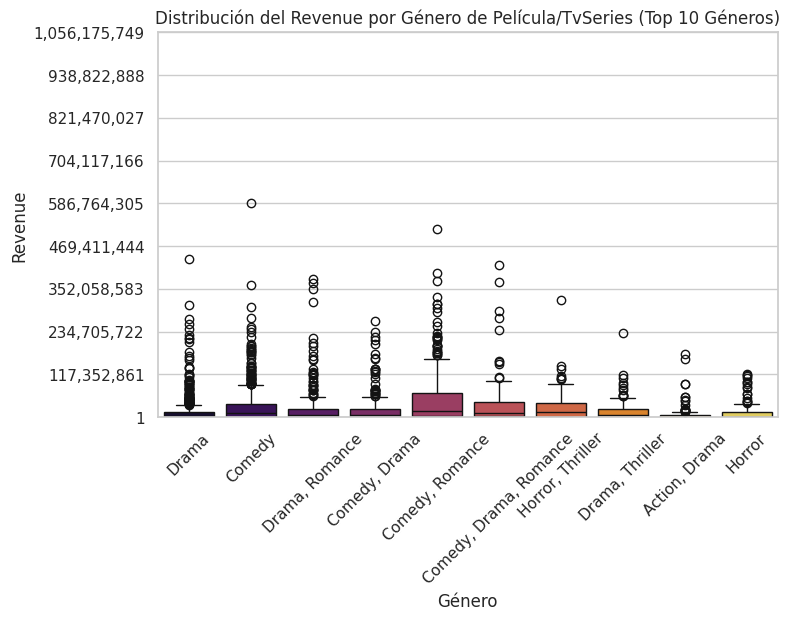

In [170]:
genre_counts = df_tmdb['genres'].value_counts()  # Frecuencia de cada género
top_10_generos = genre_counts.head(10).index # Selecciono solo los géneros más frecuentes (Top 10)
top_10_generos = df_tmdb[df_tmdb['genres'].isin(top_10_generos)]  # Filto el df para incluir solo los géneros más frecuentes

# Boxplot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Especificar el orden de los géneros
sns.boxplot(x='genres', y='revenue', data=top_10_generos, order=top_10_generos['genres'].value_counts().index, palette='inferno')
plt.title('Distribución del Revenue por Género de Película/TvSeries (Top 10 Géneros)')  # Título y etiquetas de los ejes
plt.ylabel('Revenue')
plt.xlabel('Género')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Ajustar los límites del eje Y y configurar los ticks manualment
max_revenue = top_10_generos['revenue'].max()
min_revenue = top_10_generos['revenue'].min()
plt.ylim(min_revenue, max_revenue * 1.8)

# Configurar ticks del eje Y con base en el rango de revenue
num_ticks = 10  # Número de ticks deseados
yticks = np.linspace(min_revenue, max_revenue * 1.8, num_ticks)
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels([f'{int(tick):,}' for tick in yticks]);  # Formato de los números con comas

# Guardar el gráfico
plt.savefig('/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/Imagenes/Graficos/Distribucion_Revenue_Genero.png')

##**Consultas adicionales**

In [171]:
max_rev = df_tmdb.revenue.max()
min_rev = df_tmdb.revenue.min()
avg_rev = df_tmdb["revenue"].mean()
avg_rev = round(avg_rev, 2)
print(max_rev)
print(min_rev)
print(avg_rev)

2800000000
1
58615257.83


##**Un pequeño tratamiento adicional para df_title_basics**

In [172]:
df_title_basics_filtrado = df_title_basics[(df_title_basics['runtimeMinutes'] >= 22) & (df_title_basics['runtimeMinutes'] <= 180)]
df_title_basics_filtrado = df_title_basics_filtrado[(df_title_basics_filtrado['startYear'] >= 1994) & (df_title_basics_filtrado['startYear'] <= 2024)]
df_title_basics_filtrado.sample(15)

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres
189875,tt21979094,movie,Chevelle: Another Kap Szn,0,2022,60,Drama
117385,tt0120250,movie,Sus ojos se cerraron y el mundo sigue andando,0,1997,93,"Drama,Music,Romance"
628880,tt15144526,movie,Valldaura: A Quarantine Cabin,0,2022,79,Documentary
211280,tt3509318,tvSeries,Wifi,0,2014,30,Comedy
751569,tt12472312,movie,Penélope,0,2020,86,Action
144181,tt26755318,movie,The Last Guardian,0,2023,78,Sci-Fi
302725,tt0316356,movie,Open Range,0,2003,139,"Action,Drama,Romance"
596580,tt28347720,movie,La Cancha,0,2023,54,Documentary
669191,tt12319596,movie,Het is uw land,0,2014,59,Documentary
648101,tt7942736,movie,Spider in the Web,0,2019,113,Thriller


In [173]:
print("Pelicula/serie mas reciente: ", df_title_basics_filtrado["startYear"].max())
print("Pelicula/serie mas antigua: ", df_title_basics_filtrado["startYear"].min())
print("Pelicula/serie de mas larga duracion: ", df_title_basics_filtrado["runtimeMinutes"].max())
print("Pelicula/serie de mas corta duracion: ", df_title_basics_filtrado["runtimeMinutes"].min())

Pelicula/serie mas reciente:  2024
Pelicula/serie mas antigua:  1994
Pelicula/serie de mas larga duracion:  180
Pelicula/serie de mas corta duracion:  22


**-------------------------------------------------------------------------------------------------------------------------------------------------------------**

<ipython-input-174-7aee25682dc9>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




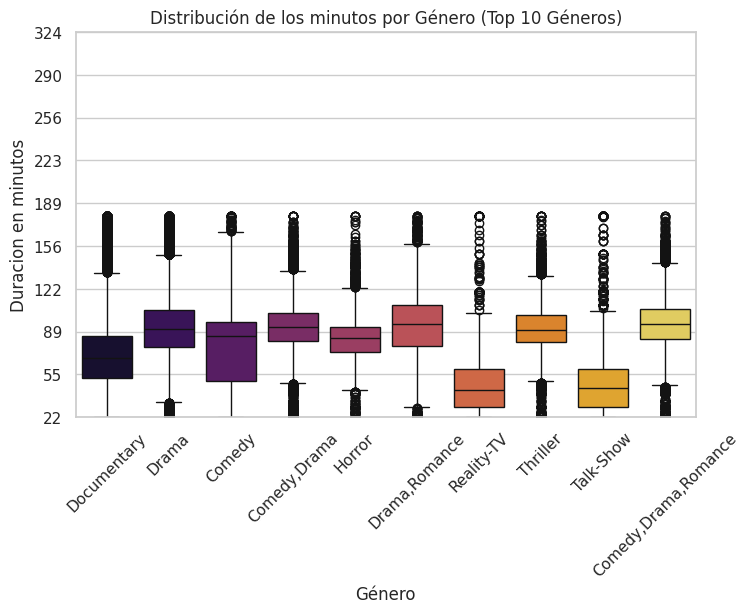

In [174]:
genre_counts = df_title_basics_filtrado['genres'].value_counts()
top_10_generos = genre_counts.head(10).index
top_10_generos = df_title_basics_filtrado[df_title_basics_filtrado['genres'].isin(top_10_generos)]

# Boxplot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

sns.boxplot(x='genres', y='runtimeMinutes', data=top_10_generos, order=top_10_generos['genres'].value_counts().index, palette='inferno')
plt.title('Distribución de los minutos por Género (Top 10 Géneros)')
plt.ylabel('Duracion en minutos')
plt.xlabel('Género')
plt.xticks(rotation=45)

max_time = top_10_generos['runtimeMinutes'].max()
min_time = top_10_generos['runtimeMinutes'].min()
plt.ylim(min_time, max_time * 1.8)

num_ticks = 10
yticks = np.linspace(min_time, max_time * 1.8, num_ticks)
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels([f'{int(tick):,}' for tick in yticks]);  # Formato de los números con comas

# Guardar el gráfico
plt.savefig('/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/Imagenes/Graficos/Distribucion_minutos_genero.png')

##**Explorando un poco mas a fondo df_title_ratings**

In [175]:
df_title_ratings.describe()

,averageRating,numVotes
count,1443621.00,1443621.00
mean,6.96,1032.36
std,1.38,17696.14
min,1.00,5.00
25%,6.20,11.00
50%,7.20,26.00
75%,7.90,101.00
max,10.00,2901903.00


In [176]:
df_title_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277
2,tt0000003,6.50,2020
3,tt0000004,5.30,180
4,tt0000005,6.20,2786
5,tt0000006,5.10,187
6,tt0000007,5.40,870
7,tt0000008,5.40,2201
8,tt0000009,5.40,212
9,tt0000010,6.80,7586


In [177]:
avg_num_votes = df_title_ratings['numVotes'].mean()
avg_num_votes = round(avg_num_votes, 2)

mas_votos_recibidos = df_title_ratings['numVotes'].max()

avg_rating = df_title_ratings['averageRating'].mean()
avg_rating = round(avg_rating, 2)

mayor_rating = df_title_ratings['averageRating'].max()

# Mostrar
print("Promedio de votos para una programacion: ", avg_num_votes)
print("Programacion mas votada: ", mas_votos_recibidos)
print("Rating promedio: ", avg_rating)
print("Programacion con mayor rating: ", mayor_rating )

Promedio de votos para una programacion:  1032.36
Programacion mas votada:  2901903
Rating promedio:  6.96
Programacion con mayor rating:  10.0


##**Graficos de pizza para observar distribuciones**

###**averageRating**

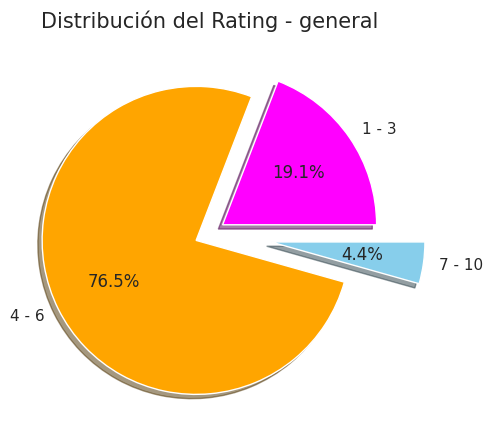

In [178]:
# Crear categorías de ratings para cada registro
agrupar_registros_rating = [
    (df_title_ratings['averageRating'] >= 0) & (df_title_ratings['averageRating'] < 4),
    (df_title_ratings['averageRating'] >= 4) & (df_title_ratings['averageRating'] < 7),
    (df_title_ratings['averageRating'] >= 7) & (df_title_ratings['averageRating'] < 10),
    (df_title_ratings['averageRating'] >= 10)
]

opciones_de_rango = ['0-4', '4-7', '7-10', '>10']
df_title_ratings['agrupar_registros_rating'] = pd.cut(df_title_ratings['averageRating'],
                                                      bins=[3,6,9,10],
                                                      labels=['1 - 3', '4 - 6', '7 - 10'],
                                                      right=False)

# Contar el número de registros en cada categoría
rating_counts = df_title_ratings['agrupar_registros_rating'].value_counts().sort_index()

# Variable para resaltar/expandir porciones del grafico
expandir_porcion = [0.1,0.1,0.4]

# Crear gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=['magenta', 'orange', 'skyblue'], explode= expandir_porcion, shadow= True)
plt.title('Distribución del Rating - general', fontsize = 15, pad = 10);

# Guardar el gráfico
plt.savefig('/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/Imagenes/Graficos/Distribucion_rating_general.png')

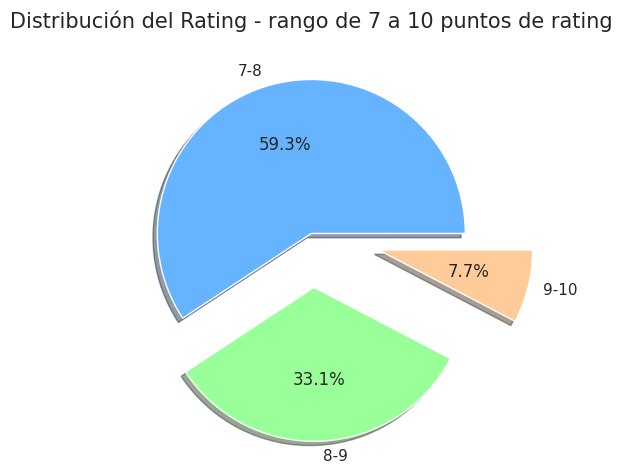

In [179]:
agrupar_registros_rating = [
    (df_title_ratings['averageRating'] >= 7) & (df_title_ratings['averageRating'] < 8),
    (df_title_ratings['averageRating'] >= 8) & (df_title_ratings['averageRating'] < 9),
    (df_title_ratings['averageRating'] >= 9)
]

opciones_de_rango = ['7-8', '8-9', '>9']
df_title_ratings['agrupar_registros_rating'] = pd.cut(df_title_ratings['averageRating'], bins=[7, 8, 9, 10], labels=['7-8', '8-9', '9-10'], right=False)

rating_counts = df_title_ratings['agrupar_registros_rating'].value_counts().sort_index()

expandir_porcion = [0,0.35,0.45]

plt.figure(figsize=(5, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'], explode= expandir_porcion, shadow= True)
plt.title('Distribución del Rating - rango de 7 a 10 puntos de rating', fontsize =15, pad =10);

# Guardar el gráfico
plt.savefig('/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/Imagenes/Graficos/Distribucion_rating_rangos.png')

Lo mas probable es que se terminen eligiendo valores entre 7 y 9.5 puntos de rating para la parte final del analisis, el rango de valores estara sujeto a la cantidad de votos que reciba cada pelicula/serie.

###**numVotes**

In [180]:
df_title_ratings.head()

,tconst,averageRating,numVotes,agrupar_registros_rating
0,tt0000001,5.70,2059,NaN
1,tt0000002,5.60,277,NaN
2,tt0000003,6.50,2020,NaN
3,tt0000004,5.30,180,NaN
4,tt0000005,6.20,2786,NaN


In [181]:
df_title_ratings = df_title_ratings.drop(columns=["agrupar_registros_rating"])
df_title_ratings .head()

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277
2,tt0000003,6.50,2020
3,tt0000004,5.30,180
4,tt0000005,6.20,2786


In [182]:
df_title_ratings_filtrado = df_title_ratings[(df_title_ratings['averageRating'] >= 6) & (df_title_ratings['numVotes'] >= 1000)]
df_title_ratings_filtrado.head()

,tconst,averageRating,numVotes
2,tt0000003,6.50,2020
4,tt0000005,6.20,2786
9,tt0000010,6.80,7586
11,tt0000012,7.40,12914
13,tt0000014,7.10,5866


In [183]:
df_title_ratings_filtrado.shape

(70909, 3)

<ipython-input-184-4127ca59826f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



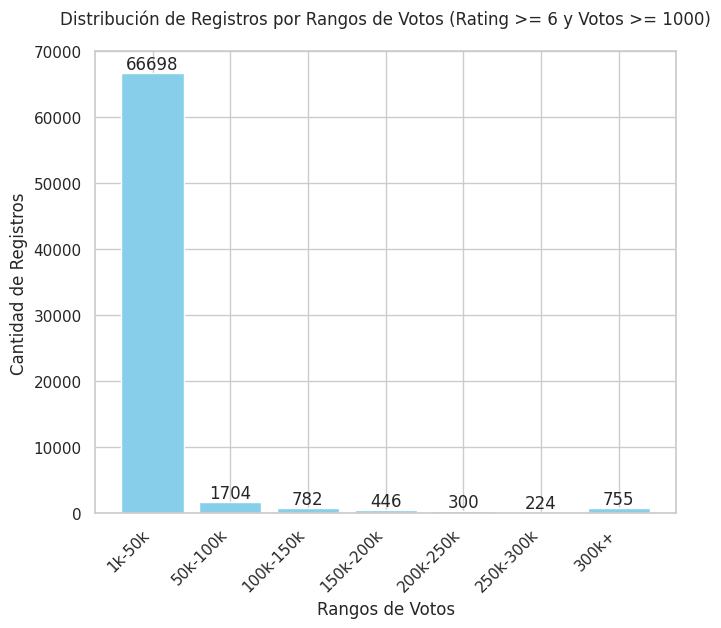

In [184]:
# Definir los rangos de votos
bins = [1000, 50000, 100000, 150000, 200000, 250000, 300000, float('inf')]
labels = ['1k-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k+']

# Crear una nueva columna para los rangos de votos
df_title_ratings_filtrado['vote_range'] = pd.cut(df_title_ratings_filtrado['numVotes'], bins=bins, labels=labels, right=False)

# Contar el número de registros en cada rango de votos
vote_range_counts = df_title_ratings_filtrado['vote_range'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(7.5, 6))
bars = plt.bar(vote_range_counts.index, vote_range_counts.values, color='skyblue')

# Agregar etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Configurar los ejes y el título
plt.xlabel('Rangos de Votos')
plt.ylabel('Cantidad de Registros')
plt.title('Distribución de Registros por Rangos de Votos (Rating >= 6 y Votos >= 1000)', x=0.5, pad=20)
plt.xticks(rotation=45, ha='right');

# Guardar el gráfico
plt.savefig('/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/Imagenes/Graficos/Registros_rango_votos.png')

##**Tratamiento adicional para df_tmdb**

In [185]:
df_tmdb.describe()

,vote_average,vote_count,release_date,revenue,budget,popularity,ROI
count,9122.00,9122.00,9122,9122.00,9122.00,9122.00,9122.00
mean,6.16,1383.80,2002-02-24 07:43:57.053277824,58615257.83,24875194.08,18.30,1.04
min,0.00,0.00,1914-04-25 00:00:00,1.00,1.00,0.00,-1.00
25%,5.74,59.00,1995-12-29 18:00:00,1472992.50,2500000.00,6.16,-0.42
50%,6.38,366.00,2007-04-11 12:00:00,11040230.00,10000000.00,12.72,0.48
75%,6.99,1402.75,2014-09-05 00:00:00,50000000.00,30000000.00,19.83,1.96
max,10.00,34495.00,2024-07-23 00:00:00,2800000000.00,460000000.00,2994.36,7.36
std,1.60,2741.01,NaN,138972561.03,38848416.13,59.78,1.89


In [186]:
df_tmdb.shape

(9122, 10)

In [187]:
df_tmdb_filtrado = df_tmdb[
    (df_tmdb['vote_average'] >= 5) &
    (df_tmdb['vote_count'] >= 500) &
    (df_tmdb['revenue'] >= 150000) & (df_tmdb['revenue'] <= 900000000) &
    (df_tmdb['budget'] >= 250000) & (df_tmdb['budget'] <= 400000000)
]

df_tmdb_filtrado.head()

,vote_average,vote_count,release_date,revenue,budget,imdb_id,popularity,genres,production_countries,ROI
0,8.36,34495,2010-07-15,825532764,160000000,tt1375666,83.95,"Action, Science Fiction, Adventure","United Kingdom, United States of America",4.16
1,8.42,32571,2014-11-05,701729206,165000000,tt0816692,140.24,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",3.25
7,8.44,27238,1999-10-15,100853753,63000000,tt0137523,69.50,Drama,United States of America,0.60
8,7.91,26638,2014-07-30,772776600,170000000,tt2015381,33.26,"Action, Science Fiction, Adventure",United States of America,3.55
12,7.64,24874,2008-04-30,585174222,140000000,tt0371746,72.90,"Action, Science Fiction, Adventure",United States of America,3.18


In [188]:
df_tmdb_filtrado.shape

(3890, 10)

In [189]:
df_tmdb_filtrado.describe()

,vote_average,vote_count,release_date,revenue,budget,popularity,ROI
count,3890.00,3890.00,3890,3890.00,3890.00,3890.00,3890.00
mean,6.66,2860.98,2005-06-26 00:24:25.912596480,109430870.16,43587914.59,29.49,1.62
min,5.00,500.00,1925-07-12 00:00:00,151530.00,250000.00,0.60,-1.00
25%,6.15,932.00,1999-09-04 00:00:00,18999788.50,13000000.00,15.45,0.09
50%,6.64,1635.50,2008-05-07 00:00:00,54834006.50,30000000.00,20.34,1.19
75%,7.17,3443.25,2014-10-16 12:00:00,135465818.00,60000000.00,29.46,2.67
max,8.70,34495.00,2023-09-13 00:00:00,895921036.00,340000000.00,2994.36,7.36
std,0.70,3281.90,NaN,146587190.99,45152842.84,78.71,1.94


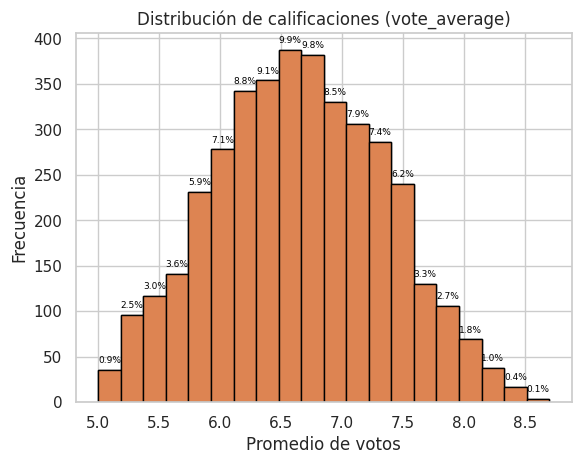

In [190]:
# Plot the histogram
ax = df_tmdb_filtrado['vote_average'].plot(kind='hist', bins=20, title='Distribución de calificaciones (vote_average)', edgecolor='black')

# Config. de las etiquetas de los ejes
ax.set_xlabel('Promedio de votos')
ax.set_ylabel('Frecuencia')

# Visibilidad de las "espinas" (bordes) del gráfico
ax.spines[['top', 'right']].set_visible(True)

# Calculando el porcentaje y poniendolo sobre las barras
n, bins, patches = ax.hist(df_tmdb_filtrado['vote_average'], bins=20, edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(n, bin_centers):
    percent = f'{(count / len(df_tmdb_filtrado) * 100):.1f}%'
    ax.annotate(percent, xy=(x, count), xycoords='data', xytext=(0, 5), textcoords='offset points', ha='center', fontsize=6.5, color='black')

# Guardar el gráfico
plt.savefig('/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/Imagenes/Graficos/Distribucion_vote_avg.png');

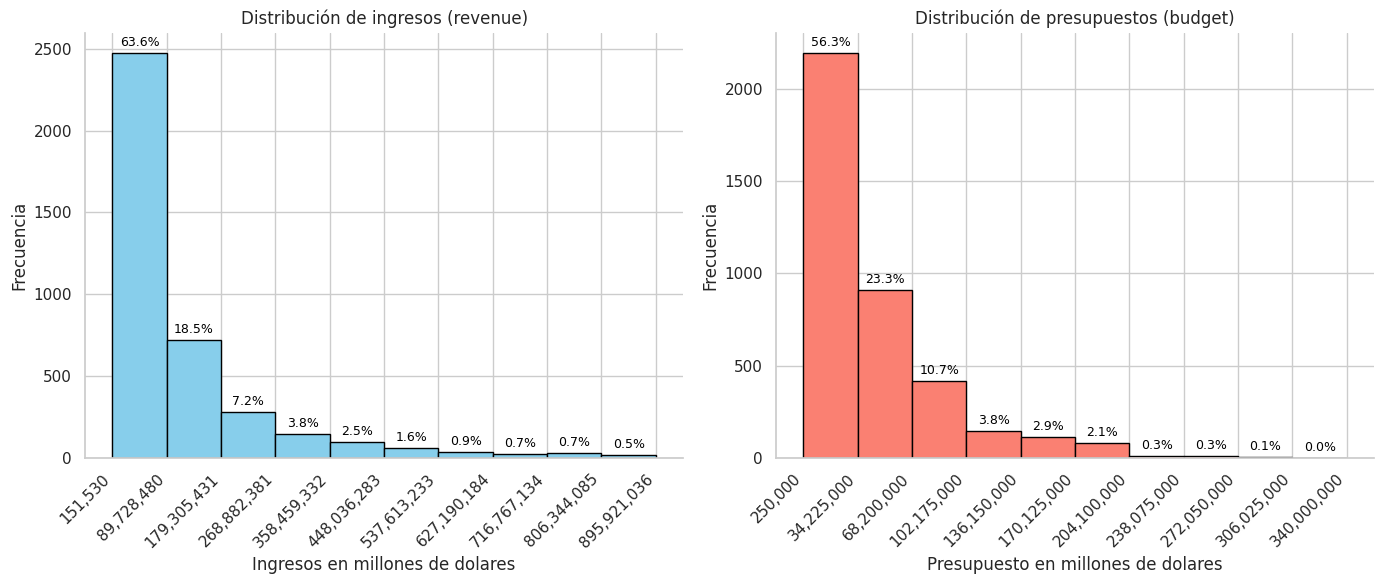

In [191]:
# @title Comparacion Revenue/Budget

# Crear la figura y los ejes para los dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Colores para las barras
color_revenue = 'skyblue'
color_budget = 'salmon'

# Plot del histograma para revenue
n1, bins1, patches1 = ax1.hist(df_tmdb_filtrado['revenue'], bins=10, edgecolor='black', color=color_revenue)
ax1.set_title('Distribución de ingresos (revenue)')
ax1.set_xlabel('Ingresos en millones de dolares')
ax1.set_ylabel('Frecuencia')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Calcular y anotar los porcentajes sobre las barras de revenue
bin_centers1 = 0.5 * (bins1[:-1] + bins1[1:])
for count, x in zip(n1, bin_centers1):
    percent = f'{(count / len(df_tmdb_filtrado) * 100):.1f}%'
    ax1.annotate(percent, xy=(x, count), xycoords='data', xytext=(0, 5), textcoords='offset points', ha='center', fontsize=9, color='black')

# Ajustar las etiquetas del eje X para revenue
ax1.set_xticks(bins1)
ax1.set_xticklabels([f'{int(b):,}' for b in bins1], rotation=45, ha='right')



# Plot del histograma para budget
n2, bins2, patches2 = ax2.hist(df_tmdb_filtrado['budget'], bins=10, edgecolor='black', color=color_budget)
ax2.set_title('Distribución de presupuestos (budget)')
ax2.set_xlabel('Presupuesto en millones de dolares')
ax2.set_ylabel('Frecuencia')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Calcular y anotar los porcentajes sobre las barras de budget
bin_centers2 = 0.5 * (bins2[:-1] + bins2[1:])
for count, x in zip(n2, bin_centers2):
    percent = f'{(count / len(df_tmdb_filtrado) * 100):.1f}%'
    ax2.annotate(percent, xy=(x, count), xycoords='data', xytext=(0, 5), textcoords='offset points', ha='center', fontsize=9, color='black')

# Ajustar las etiquetas del eje X para budget
ax2.set_xticks(bins2)
ax2.set_xticklabels([f'{int(b):,}' for b in bins2], rotation=45, ha='right')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Guardar el gráfico
plt.savefig('/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/Imagenes/Graficos/Comparacion_revenue-budget.png');

##**Verificando la informacion de los dataframes para la parte final**

##**Informaciones**

In [192]:
print(df_title_basics_filtrado.info())
print('-----------------------')
print(df_title_ratings_filtrado.info())
print('-----------------------')
print(df_tmdb_filtrado.info())

<class 'pandas.core.frame.DataFrame'>
Index: 323541 entries, 13079 to 783039
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          323541 non-null  string
 1   titleType       323541 non-null  string
 2   originalTitle   323541 non-null  string
 3   isAdult         323541 non-null  int64 
 4   startYear       323541 non-null  int64 
 5   runtimeMinutes  323541 non-null  int64 
 6   genres          323541 non-null  string
dtypes: int64(3), string(4)
memory usage: 28.9 MB
None
-----------------------
<class 'pandas.core.frame.DataFrame'>
Index: 70909 entries, 2 to 1443590
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tconst         70909 non-null  string  
 1   averageRating  70909 non-null  float64 
 2   numVotes       70909 non-null  int64   
 3   vote_range     70909 non-null  category
dtypes: category(1), float64(1),

##**Descripciones**

In [193]:
df_title_basics_filtrado.describe()

,isAdult,startYear,runtimeMinutes
count,323541.00,323541.00,323541.00
mean,0.00,2012.62,81.06
std,0.06,7.59,29.75
min,0.00,1994.00,22.00
25%,0.00,2008.00,60.00
50%,0.00,2014.00,85.00
75%,0.00,2019.00,98.00
max,1.00,2024.00,180.00


In [194]:
df_title_ratings_filtrado.describe()

,averageRating,numVotes
count,70909.00,70909.00
mean,7.48,17227.87
std,0.85,77119.18
min,6.00,1000.00
25%,6.80,1506.00
50%,7.40,2619.00
75%,8.10,6013.00
max,10.00,2901903.00


In [195]:
df_tmdb_filtrado.describe()

,vote_average,vote_count,release_date,revenue,budget,popularity,ROI
count,3890.00,3890.00,3890,3890.00,3890.00,3890.00,3890.00
mean,6.66,2860.98,2005-06-26 00:24:25.912596480,109430870.16,43587914.59,29.49,1.62
min,5.00,500.00,1925-07-12 00:00:00,151530.00,250000.00,0.60,-1.00
25%,6.15,932.00,1999-09-04 00:00:00,18999788.50,13000000.00,15.45,0.09
50%,6.64,1635.50,2008-05-07 00:00:00,54834006.50,30000000.00,20.34,1.19
75%,7.17,3443.25,2014-10-16 12:00:00,135465818.00,60000000.00,29.46,2.67
max,8.70,34495.00,2023-09-13 00:00:00,895921036.00,340000000.00,2994.36,7.36
std,0.70,3281.90,NaN,146587190.99,45152842.84,78.71,1.94


#**3. Preguntas y respuestas**


---




##**Pregunta 1: ¿Cual es la evolución del rating por tipo de contenido?**

In [196]:
def pregunta_1():

    global df_title_basics_filtrado
    global df_title_ratings_filtrado

    # Preparación de los datos
    title_type_counts = df_title_basics_filtrado['titleType'].value_counts()

    # Crear la figura y los ejes
    fig, axs = plt.subplots(1, 2, figsize=(18, 8))

    # Gráfico de pizza
    axs[0].pie(title_type_counts, labels=title_type_counts.index, autopct='%1.1f%%', startangle=140)
    axs[0].set_title('Distribución por tipo de Contenido')

    # Crear un DataFrame para el rating promedio
    df_averageRating = pd.DataFrame()

    # Gráfico de líneas
    for title_type in title_type_counts.index:
        subset = df_title_basics_filtrado[df_title_basics_filtrado['titleType'] == title_type]
        avg_rating_by_year = subset.merge(df_title_ratings_filtrado, on='tconst').groupby('startYear')['averageRating'].mean()
        avg_rating_by_year = avg_rating_by_year.reset_index()
        avg_rating_by_year['titleType'] = title_type
        df_averageRating = pd.concat([df_averageRating, avg_rating_by_year])

    sns.lineplot(data=df_averageRating, x='startYear', y='averageRating', hue='titleType', marker='o', ax=axs[1])
    axs[1].set_title('Rating promedio por Año y contenido')
    axs[1].set_xlabel('Años')
    axs[1].set_ylabel('Promedio de Rating')

    # Añadir texto a la figura
    parrafo_1 = "El análisis del contenido indica que históricamente el público consume más Películas que Series de Televisión."
    parrafo_2 = "Sin embargo, el público prefiere más Series de Televisión con un rating superior a los 7 puntos, mientras que las Películas solo alcanzan los 6 puntos."
    parrafo_3 = "A partir del año 2020, el rubro de las Películas comenzó a incrementar su rating notablemente, mientras que las Series de Televisión, si bien han mantenido su rating habitual de 7+, han tenido un ligero descenso."
    parrafo_4 = "Todos estos hechos han contribuido a que las Películas en este último tiempo comenzaran a superar a las Series en rating, justificando aún más los datos observados en el gráfico de la izquierda."

    # Posicionar los párrafos a la derecha de las gráficas
    fig.text(0.73, 0.75, parrafo_1, ha='left', va='top', fontsize=12, wrap=True)
    fig.text(0.73, 0.63, parrafo_2, ha='left', va='top', fontsize=12, wrap=True)
    fig.text(0.73, 0.49, parrafo_3, ha='left', va='top', fontsize=12, wrap=True)
    fig.text(0.73, 0.32, parrafo_4, ha='left', va='top', fontsize=12, wrap=True)

    plt.tight_layout(rect=[0, 0, 0.7, 1])  # Ajustar layout para dejar espacio a la derecha
    plt.show();

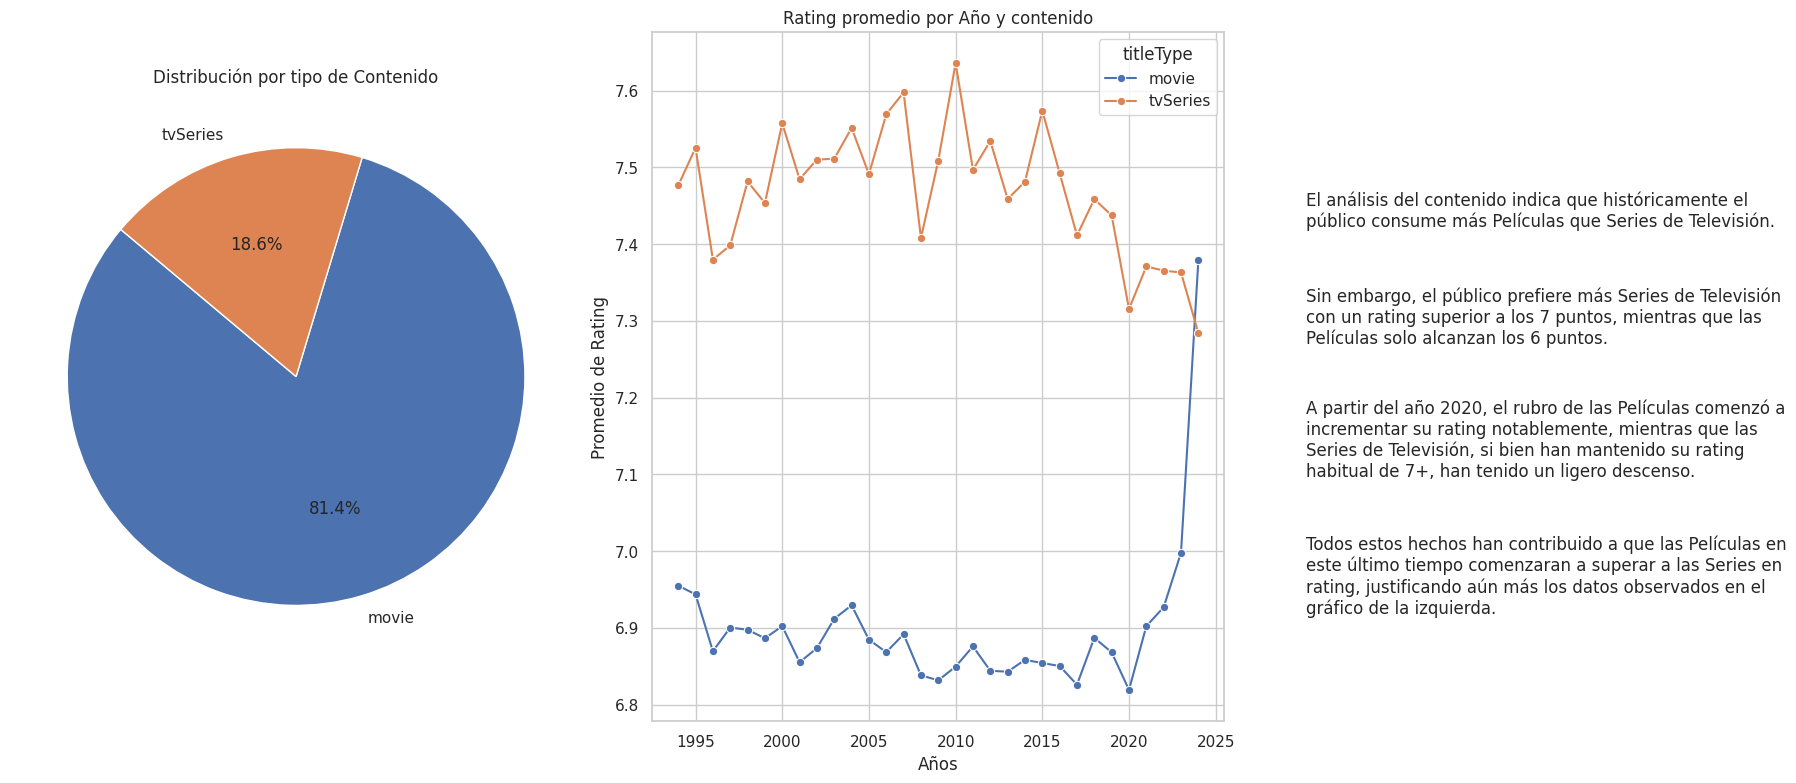

In [197]:
pregunta_1()

In [198]:
# Guardar el gráfico
plt.savefig('/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/Imagenes/Graficos/Pregunta_1.png')

<Figure size 640x480 with 0 Axes>

##**Pregunta 2: ¿Cual es el rating promedio por género?**

<ipython-input-199-456833106f39>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




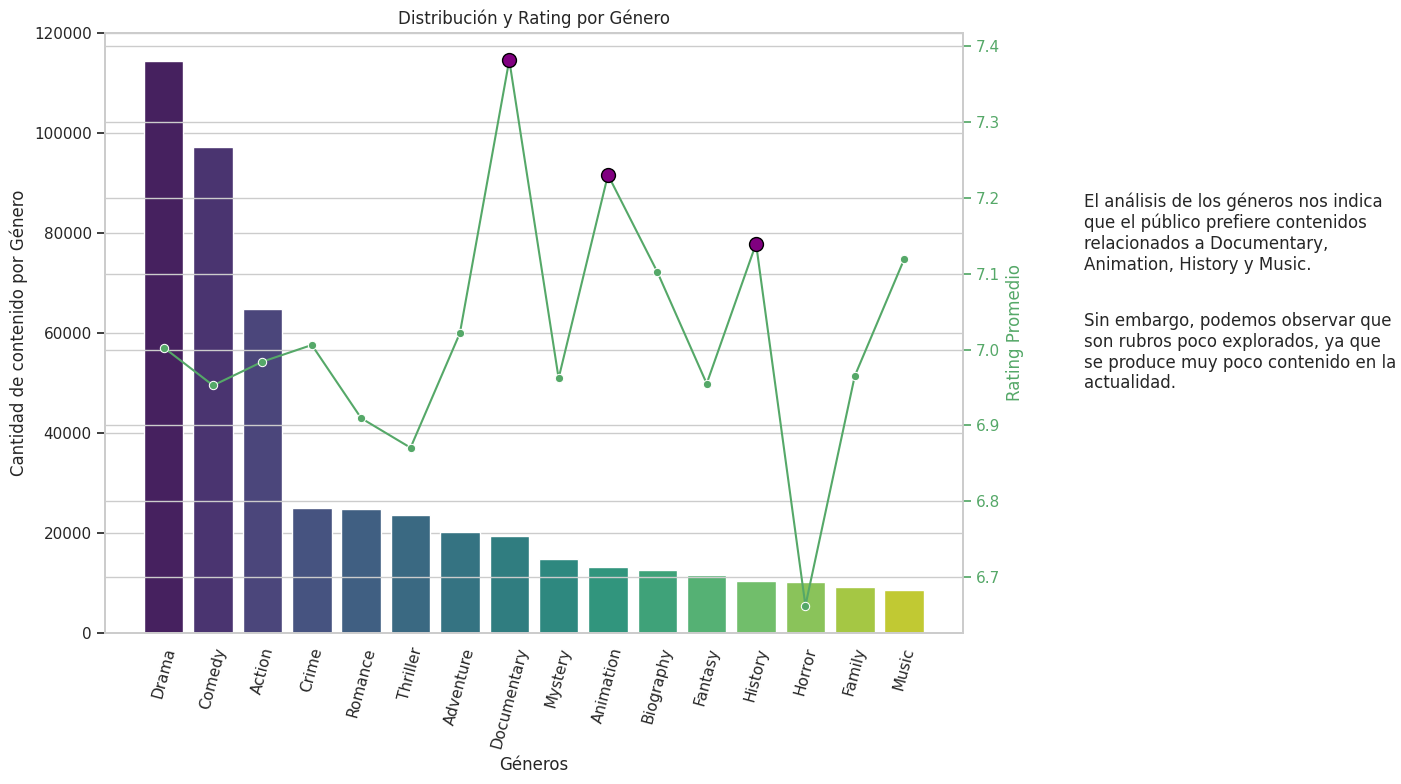

In [199]:
def pregunta_2():
    global df_title_basics_filtrado
    global df_title_ratings_filtrado
    global df_genre_stats
    global df_title_basics_expanded

    # Preparación de los datos
    df_title_basics_expanded = df_title_basics_filtrado.assign(genre=df_title_basics_filtrado['genres'].str.split(',')).explode('genre')
    df_merged = df_title_basics_expanded.merge(df_title_ratings_filtrado, on='tconst')
    df_genre_stats = df_merged.groupby('genre').agg(avg_rating=('averageRating', 'mean'), count_file_by_genres=('tconst', 'count')).reset_index()

    # Filtrar los géneros con más de 800 registros
    df_genre_stats = df_genre_stats[df_genre_stats['count_file_by_genres'] > 800]

    # Filtrar df_title_basics_expanded para que coincida con los géneros filtrados
    df_title_basics_expanded = df_title_basics_expanded[df_title_basics_expanded['genre'].isin(df_genre_stats['genre'])]

    # Ordenar los géneros por la cantidad de registros en orden descendente
    genre_order = df_title_basics_expanded['genre'].value_counts().index

    # Crear la paleta de colores
    colors = sns.color_palette("viridis", len(genre_order))

    # Crear la figura y los ejes
    fig, ax1 = plt.subplots(figsize=(14, 8))  # Ampliar el tamaño de la figura para hacer espacio para el texto

    # Gráfico de barras
    sns.countplot(data=df_title_basics_expanded, x='genre', ax=ax1, order=genre_order, palette=colors)
    ax1.set_title('Distribución y Rating por Género')
    ax1.set_xlabel('Géneros')
    ax1.set_ylabel('Cantidad de contenido por Género')
    ax1.tick_params(axis='x', rotation=75)

    # Crear un segundo eje y graficar el rating promedio
    ax2 = ax1.twinx()
    lineplot = sns.lineplot(data=df_genre_stats.sort_values(by='count_file_by_genres', ascending=False),
                 x='genre', y='avg_rating', ax=ax2, color='g', marker='o')
    ax2.set_ylabel('Rating Promedio', color='g')
    ax2.tick_params(axis='y', colors='g')

    # Destacar los tres puntos más altos en el gráfico de líneas con círculos violeta
    top_3_ratings = df_genre_stats.nlargest(3, 'avg_rating')
    for i, row in top_3_ratings.iterrows():
        genre_index = list(df_genre_stats.sort_values(by='count_file_by_genres', ascending=False)['genre']).index(row['genre'])
        ax2.scatter(genre_index, row['avg_rating'], color='purple', edgecolor='black', s=100, zorder=5)

    # Anotación
    p1 = "El análisis de los géneros nos indica que el público prefiere contenidos relacionados a Documentary, Animation, History y Music."
    p2 = "Sin embargo, podemos observar que son rubros poco explorados, ya que se produce muy poco contenido en la actualidad."

    # Posicionar los párrafos a la derecha de la gráfica
    fig.text(0.78, 0.75, p1, ha='left', va='top', fontsize=12, wrap=True)
    fig.text(0.78, 0.60, p2, ha='left', va='top', fontsize=12, wrap=True)

    fig.tight_layout(rect=[0, 0, 0.75, 1])  # Ajustar layout para dejar espacio a la derecha
    plt.show()

pregunta_2()

**NOTA:** Este insight fue realizado con contenido de 1995 en adelante, siendo la gran mayoria de los datos de los años 2000 en adelante.

In [200]:
# Ordenar df_genre_stats por la cantidad de registros en orden descendente
df_genre_stats_sorted = df_genre_stats.sort_values(by='count_file_by_genres', ascending=False)
df_genre_stats_sorted

,genre,avg_rating,count_file_by_genres
7,Drama,7.00,15036
4,Comedy,6.95,8030
0,Action,6.98,4246
5,Crime,7.01,4238
18,Romance,6.91,3915
23,Thriller,6.87,2797
1,Adventure,7.02,2551
6,Documentary,7.38,2113
15,Mystery,6.96,1918
2,Animation,7.23,1799


In [201]:
# Ordenar df_genre_stats segun rating en orden descendente
df_genre_stats_sorted = df_genre_stats.sort_values(by='avg_rating', ascending=False)
df_genre_stats_sorted

,genre,avg_rating,count_file_by_genres
6,Documentary,7.38,2113
2,Animation,7.23,1799
11,History,7.14,1163
13,Music,7.12,830
3,Biography,7.10,1706
1,Adventure,7.02,2551
5,Crime,7.01,4238
7,Drama,7.00,15036
0,Action,6.98,4246
8,Family,6.97,876


In [202]:
# Guardar el gráfico
plt.savefig('/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/Imagenes/Graficos/Pregunta_2.png')

<Figure size 640x480 with 0 Axes>

##**Pregunta 3: ¿Cuáles son los géneros que proporcionan mayor ROI?**

<ipython-input-203-4a2f9dc6e78f>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




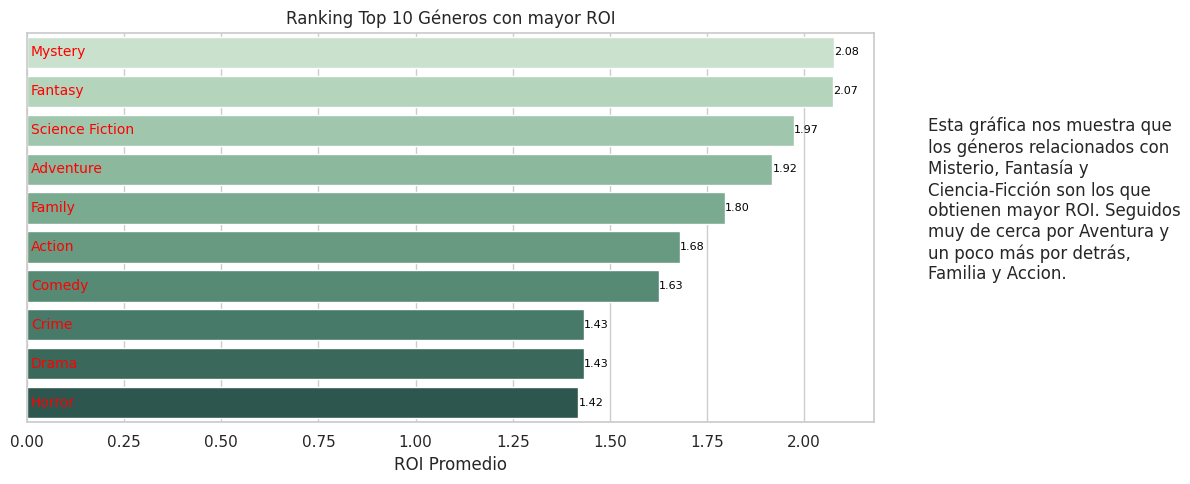

In [203]:
def pregunta_3():
    global df_tmdb_filtrado, df_genre_roi, df_genre_counts, df_tmdb_expanded

    # Preparación de los datos
    df_tmdb_expanded = df_tmdb_filtrado.assign(genre=df_tmdb_filtrado['genres'].str.split(',').explode('genre').str.strip()).explode('genre')

    # Conteo de géneros
    df_genre_counts = df_tmdb_expanded['genre'].value_counts().rename_axis('genre').reset_index(name='counts')

    # Filtrar géneros con al menos 100 registros
    df_genre_counts = df_genre_counts[df_genre_counts['counts'] >= 100]

    # Filtrar df_tmdb_expanded con los géneros filtrados
    df_tmdb_expanded = df_tmdb_expanded[df_tmdb_expanded['genre'].isin(df_genre_counts['genre'])]

    # Calcular el ROI promedio por género
    df_genre_roi = df_tmdb_expanded.groupby('genre')['ROI'].mean().sort_values(ascending=False).head(10)

    # Visualización
    fig, ax = plt.subplots(figsize=(12, 5))

    # Gráfico de barras
    sns.barplot(x=df_genre_roi.values, y=df_genre_roi.index, palette='ch:2.5,-.2,dark=.3', ax=ax)
    ax.set_title('Ranking Top 10 Géneros con mayor ROI')
    ax.set_xlabel('ROI Promedio')
    ax.yaxis.set_visible(False)  # Desactivar el eje Y

    # Añadir nombres de géneros al inicio de cada barra
    for i, (genre, roi) in enumerate(zip(df_genre_roi.index, df_genre_roi.values)):
        ax.text(0.01, i, genre, ha='left', va='center', fontsize=10, color='red')

    # Añadir porcentajes al final de cada barra
    for i, value in enumerate(df_genre_roi.values):
        ax.text(value, i, f'{value:.2f}', va='center', ha='left', fontsize=8, color='black')

    # Añadir anotación a la figura
    parrafo = ("Esta gráfica nos muestra que los géneros relacionados con "
         "Misterio, Fantasía y Ciencia-Ficción son los que obtienen mayor ROI. "
         "Seguidos muy de cerca por Aventura y un poco más por detrás, Familia y Accion.")

    # Posicionar el párrafo a la derecha de la gráfica
    fig.text(0.78, 0.75, parrafo, ha='left', va='top', fontsize=12, wrap=True)

    fig.tight_layout(rect=[0, 0, 0.75, 1])  # Ajustar layout para dejar espacio a la derecha
    plt.show()

pregunta_3()

In [204]:
df_genre_counts .head(15)

,genre,counts
0,Drama,518
1,Action,488
2,Comedy,438
3,Thriller,413
4,Adventure,371
5,Science Fiction,259
6,Crime,234
7,Fantasy,224
8,Romance,187
9,Family,183


In [205]:
df_genre_roi.head(10)

genre
Mystery           2.08
Fantasy           2.07
Science Fiction   1.97
Adventure         1.92
Family            1.80
Action            1.68
Comedy            1.63
Crime             1.43
Drama             1.43
Horror            1.42
Name: ROI, dtype: float64

In [206]:
# Guardar el gráfico
plt.savefig('/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/Imagenes/Graficos/Pregunta_3.png')

<Figure size 640x480 with 0 Axes>

##**Pregunta 4: ¿Cuáles son los países con mayor producción de contenido?**

In [208]:
import plotly.express as px

def pregunta_4():
    global df_tmdb_filtrado, df_plot

    # Separar los valores múltiples en la columna 'production_countries' usando explode
    df_tmdb_exploded_countries = df_tmdb_filtrado.assign(production_countries=df_tmdb_filtrado['production_countries'].str.split(',')).explode('production_countries').copy()
    df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()

    # Agrupar por produccion, calcular el promedio del ROI y el total de registros
    df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg({'ROI': 'mean', 'production_countries': 'count'})
    df_plot.rename(columns={'production_countries': 'count'}, inplace=True)

    # Redondear los valores del ROI a 2 decimales
    df_plot['ROI'] = df_plot['ROI'].round(2)

    # Seleccionar los 15 países que más contenido generan
    df_plot = df_plot.nlargest(15, 'count')

    # Asignar posiciones fijas en una cuadrícula con las burbujas más oscuras más arriba
    df_plot = df_plot.sort_values('ROI', ascending=True)
    num_countries = len(df_plot)
    grid_size = int(np.ceil(np.sqrt(num_countries)))
    df_plot['x'] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
    df_plot['y'] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]

    # Gráfico de burbujas usando Plotly
    fig = px.scatter(df_plot, x='x', y='y',
                     size='count', color='ROI',
                     text=df_plot.index,
                     color_continuous_scale='Blues',
                     size_max= 75,
                     title='Países con mayor producción de contenido')

     # Actualizar el diseño para ocultar las etiquetas de los ejes
    fig.update_layout(
        xaxis=dict(showticklabels=False),
        yaxis=dict(showticklabels=False)
    )

    # Mostrar gráfico
    fig.show()

pregunta_4()

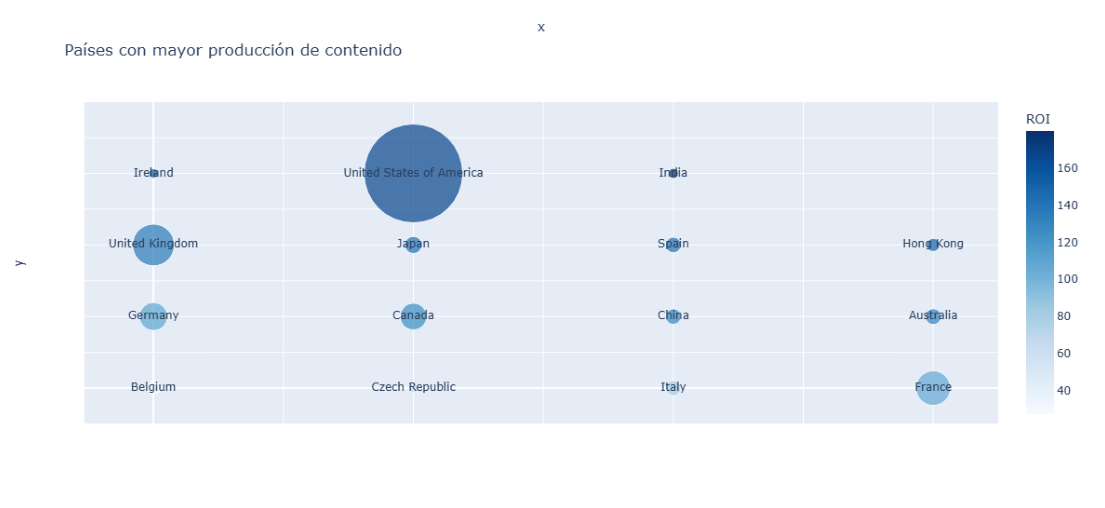

In [209]:
from PIL import Image

img_pregunta_4 = "/content/drive/MyDrive/BOOTCAMP_2024/JUNIO/Imagenes/Pregunta_4/paises_mayor_produccion_contenido.png" # Ruta de la imagen

# Cargar la imagen
image = Image.open(img_pregunta_4)

# Ajustar el tamaño de la figura
plt.figure(figsize=(14, 18)) # (ancho, alto)

# Mostrar la imagen
plt.imshow(image)
plt.axis('off')  # No mostrar los ejes
plt.show()

In [210]:
df_plot.head()

,ROI,count,x,y
production_countries,,,,
Belgium,0.27,66,0,0
Czech Republic,0.60,33,1,0
Italy,0.79,84,2,0
France,1.07,421,3,0
Germany,1.09,280,0,1


##**Conclusion de cierre del Analisis**

**ONCLUSION:** Basado en los análisis y datos proporcionados, Para maximizar el retorno de inversión en el sector del entretenimiento, se recomienda **diversificar las inversiones** entre películas de alta calidad, que tengan una duracion de entre 50 y 150 minutos y series de televisión con buenos ratings, con capitulos de 20 a 40 minutos de duracion.

Focalizarse en **géneros** que ya han demostrado ser **altamente rentables**, como **Misterio, Fantasía y Ciencia-Ficción**, mientras se exploran oportunidades en géneros populares pero subproducidos como **Documentary, Animation, History y Music**, lo que significa que hay poca oferta pero si hay demanda, lo que representa una oportunidad para captar un nicho de **mercado desatendido**.

Además, dirigir las producciones hacia mercados internacionales con **alto ROI**, como el Reino Unido (foco principal en Irlanda) y España en Europa, los Estados Unidos en America e India (foco principal), Japon y Hong-Kong en Asia , para asegurar un alcance más amplio y mayores ganancias futuras.
